<a href="https://colab.research.google.com/github/klstak/NutriGie/blob/Machine-Learning/Collab/clustering_food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Clustering Food

In [5]:
# Specify the file path
file_path = '/content/drive/MyDrive/capstone/ML/foods.csv'

# Read the CSV file into a DataFrame
food = pd.read_csv(file_path)
food

,no,takaran_g,nama,energi_kkal,protein_g,lemak_g,karbohidrat_g
0,1,100 gr,alpukat,85,"0,9","6,5","7,7"
1,2,100 gr,Apel,58,"30,12","30,12","14,9"
2,3,25 gr,Bakpia,68,"2,175","1,675","11,025"
3,4,1 mangkok,bakso,283,"17,37","18,43","10,61"
4,5,50 gr,Bakwan,140,"4,1","5,1","19,5"
...,...,...,...,...,...,...,...
169,170,66 gr,es krim,133,"2,32","7,08","16,1"
170,171,1 gelas,jasuke,355,"9,04","4,45","71,5"
171,172,257 gr,burger,480,22,25,42
172,173,60 gr,cimol,133,"3,13","0,58","24,81"


In [15]:
# Define the columns to preprocess
columns_to_preprocess = ['energi_kkal', 'protein_g', 'lemak_g', 'karbohidrat_g']

# Convert comma-separated decimal values to dot-separated values
for column in columns_to_preprocess:
    food[column] = food[column].astype(str).str.lower().str.replace(',', '.')

# Convert the columns to numeric type
food[columns_to_preprocess] = food[columns_to_preprocess].apply(pd.to_numeric, errors='coerce')

# Convert the 'nama' column to lowercase
food['nama'] = food['nama'].str.lower()

# Convert the 'takaran_g' column to lowercase
food['takaran_g'] = food['takaran_g'].astype(str).str.lower()


In [16]:
food.dtypes

no                 int64
takaran_g         object
nama              object
energi_kkal      float64
protein_g        float64
lemak_g          float64
karbohidrat_g    float64
dtype: object

In [17]:
#Define the X
X_makanan = food[["energi_kkal","protein_g","lemak_g","karbohidrat_g"]]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Normalize the data in X_makanan
X_norm = scaler.fit_transform(X_makanan)

# Create a new dataframe with the normalized values
X_normalized = pd.DataFrame(X_norm, columns=X_makanan.columns)

# Assign the normalized values back to X_makanan
X_makanan[X_normalized.columns] = X_normalized

In [20]:
X_makanan

,energi_kkal,protein_g,lemak_g,karbohidrat_g
0,0.073816,0.006040,0.044952,0.038232
1,0.036212,0.202148,0.208299,0.073982
2,0.050139,0.014597,0.011584,0.054742
3,0.349582,0.116577,0.127455,0.052681
4,0.150418,0.027517,0.035270,0.096822
...,...,...,...,...
169,0.140669,0.015570,0.048963,0.079940
170,0.449861,0.060671,0.030775,0.355015
171,0.623955,0.147651,0.172891,0.208540
172,0.140669,0.021007,0.004011,0.123188


In [21]:
missing_values = X_makanan.isna().sum()
print(missing_values)

energi_kkal      0
protein_g        0
lemak_g          0
karbohidrat_g    1
dtype: int64


In [23]:
#Filling Missing Values in karbohidrat_g column with most frequent value
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(X_makanan[['karbohidrat_g']])
X_makanan['karbohidrat_g'] = imputer.transform(X_makanan[['karbohidrat_g']])

<ipython-input-23-3f5680ed33fa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_makanan['karbohidrat_g'] = imputer.transform(X_makanan[['karbohidrat_g']])


Silhouette score for k=2: 0.5465789896059355
Silhouette score for k=3: 0.46785861181976945
Silhouette score for k=4: 0.4800858166424417
Silhouette score for k=5: 0.42194242075147737
Silhouette score for k=6: 0.4040249686023872
Silhouette score for k=7: 0.38559011325994974
Silhouette score for k=8: 0.35172064157546457
Silhouette score for k=9: 0.37434274154316977
Silhouette score for k=10: 0.3484546362466309
Silhouette score for k=11: 0.3404476697934963
Silhouette score for k=12: 0.36302527020638237
Silhouette score for k=13: 0.37545263257585026
Silhouette score for k=14: 0.3319794174987783
Silhouette score for k=15: 0.35678289301156774
Silhouette score for k=16: 0.35331004734253113


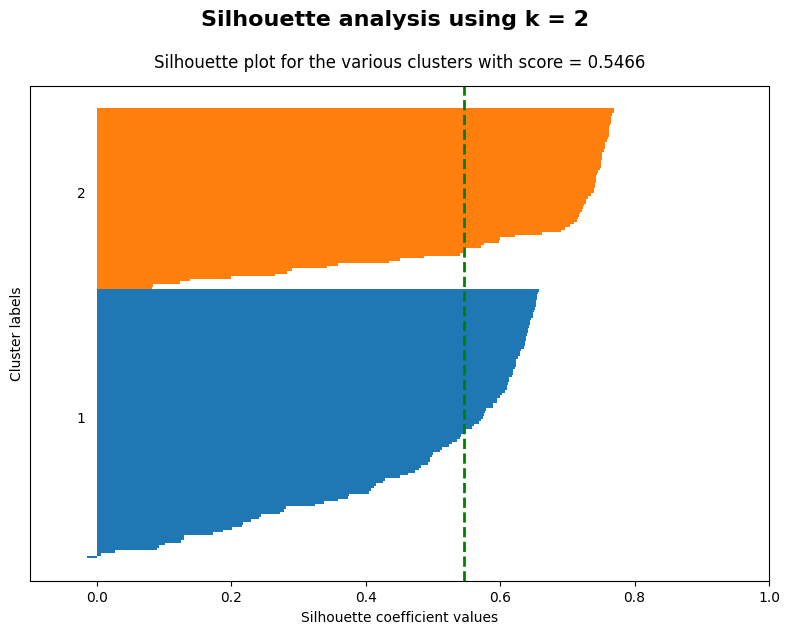

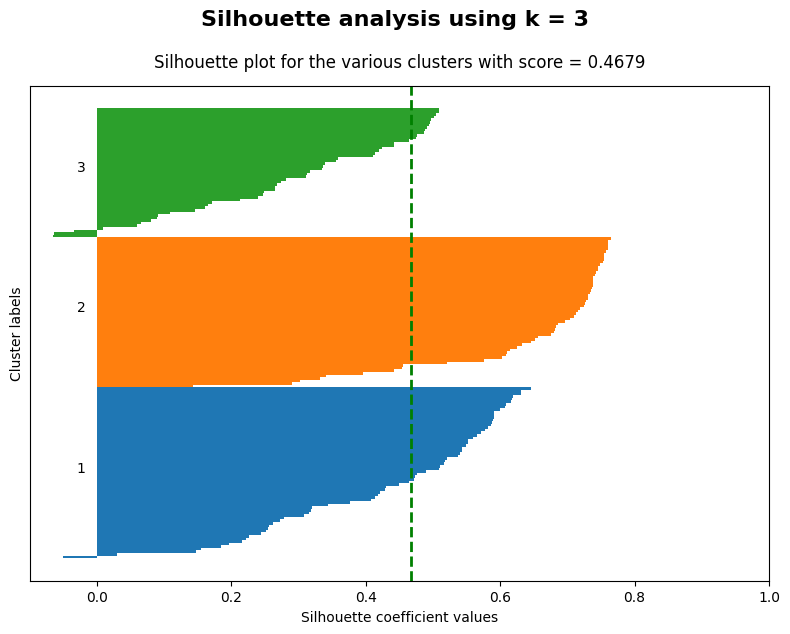

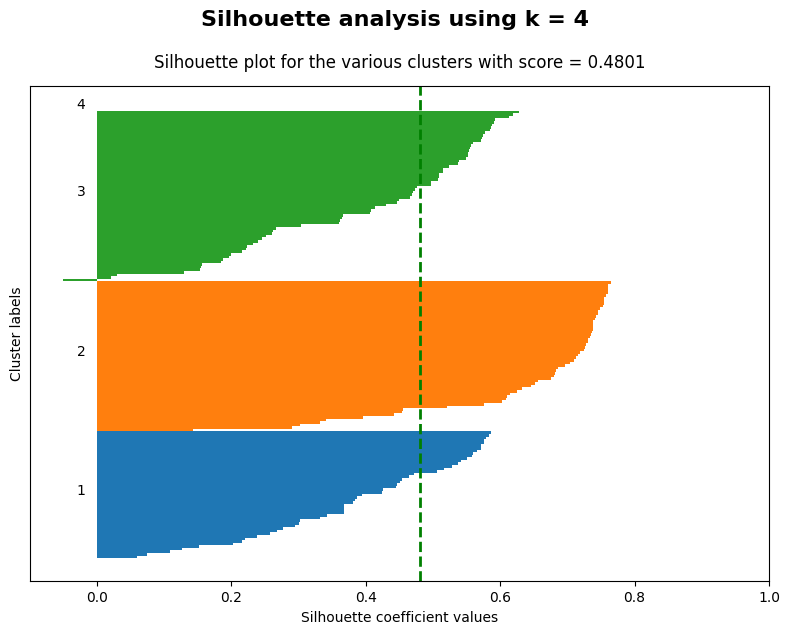

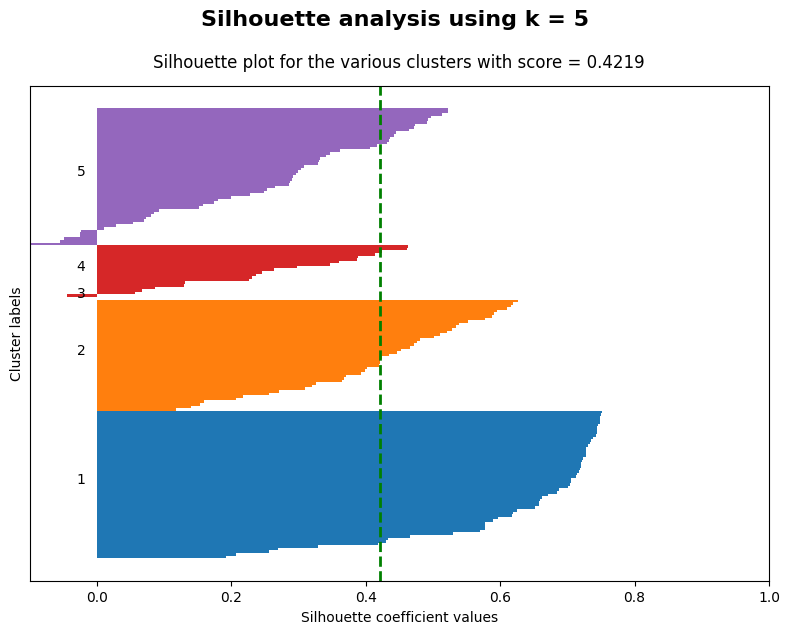

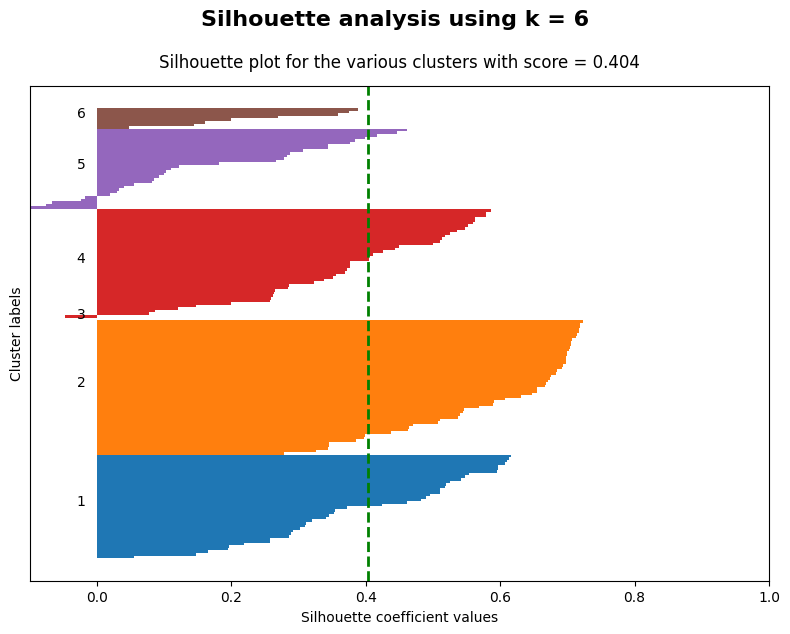

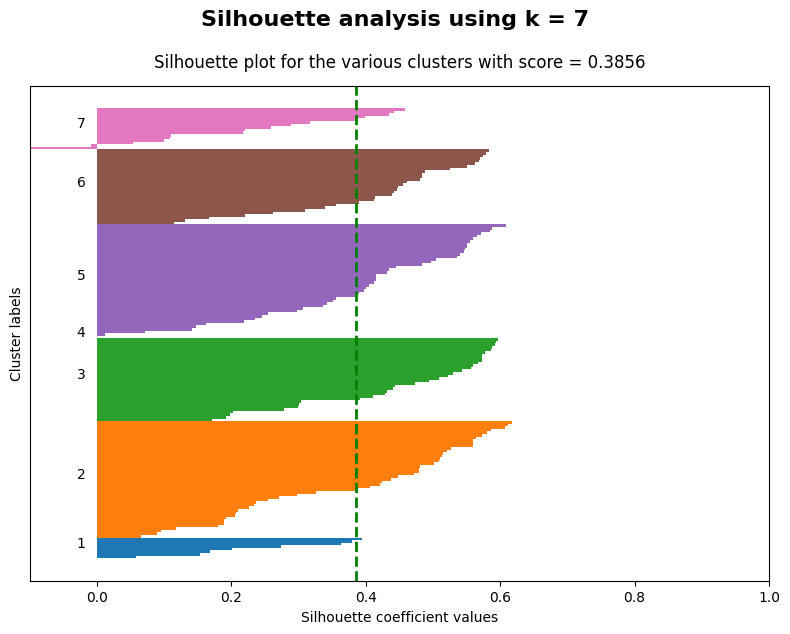

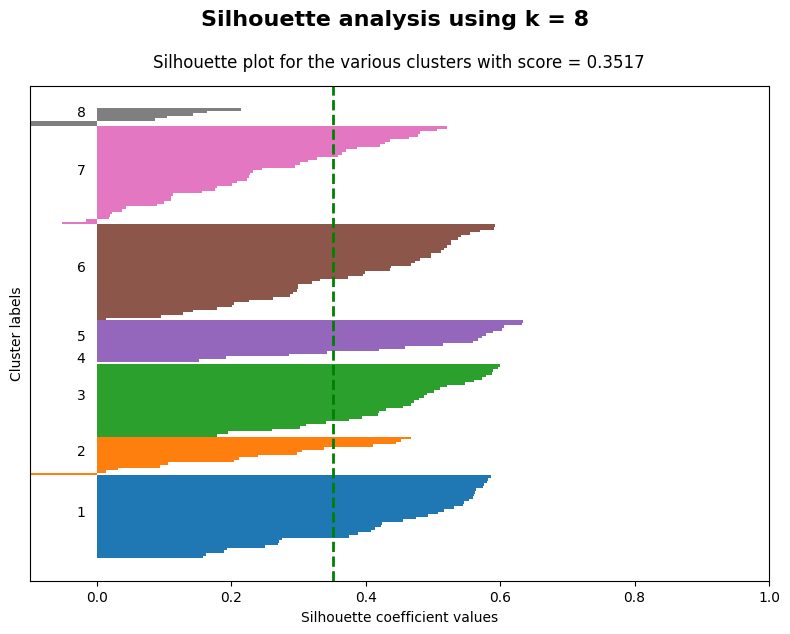

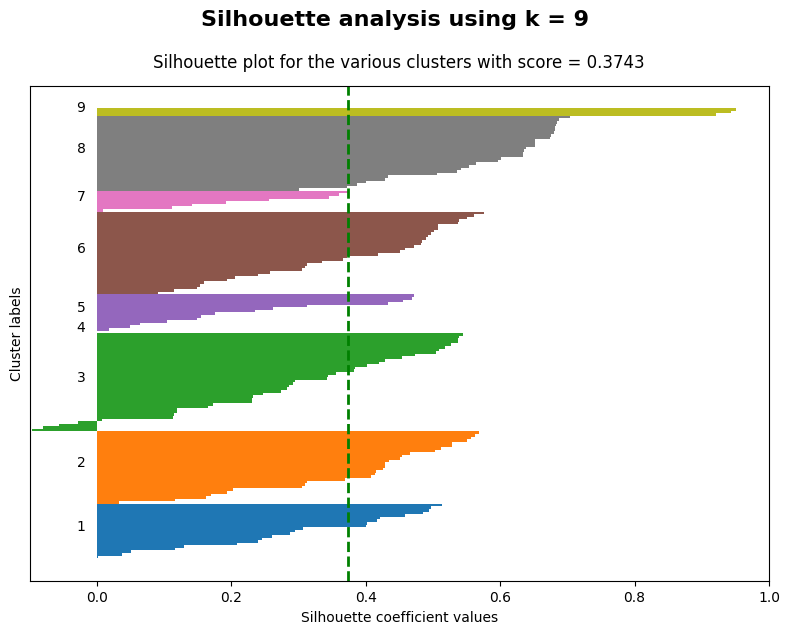

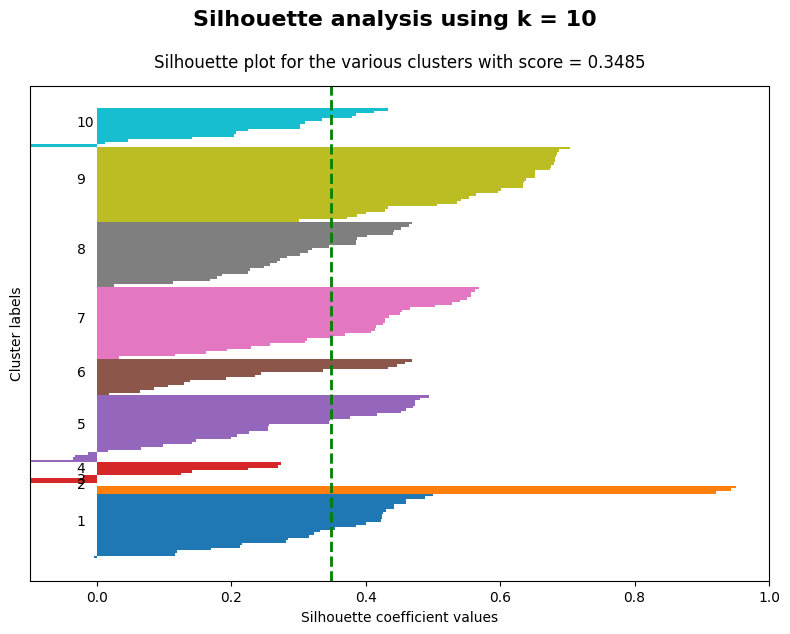

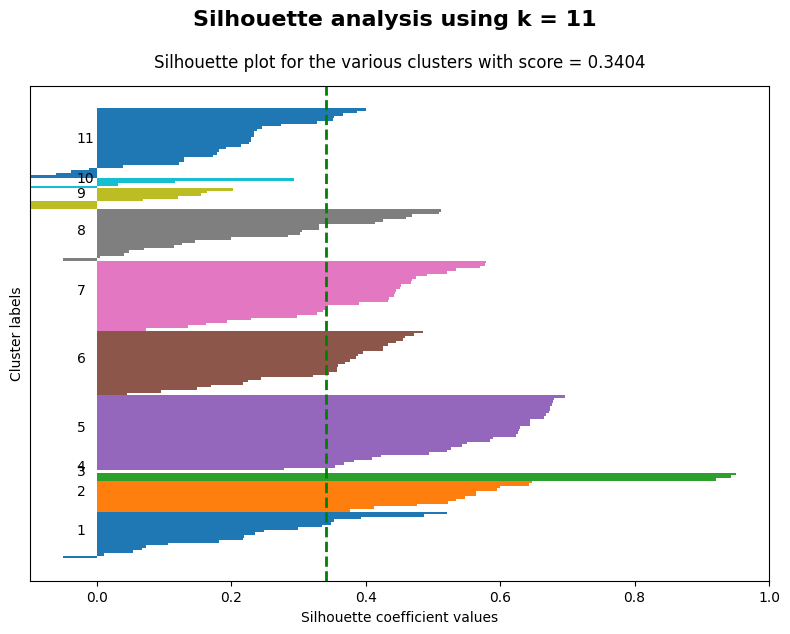

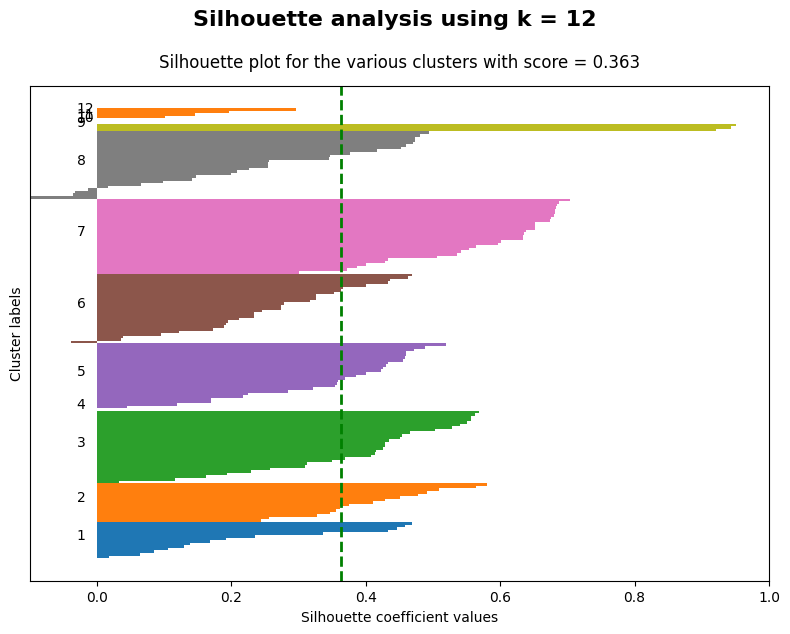

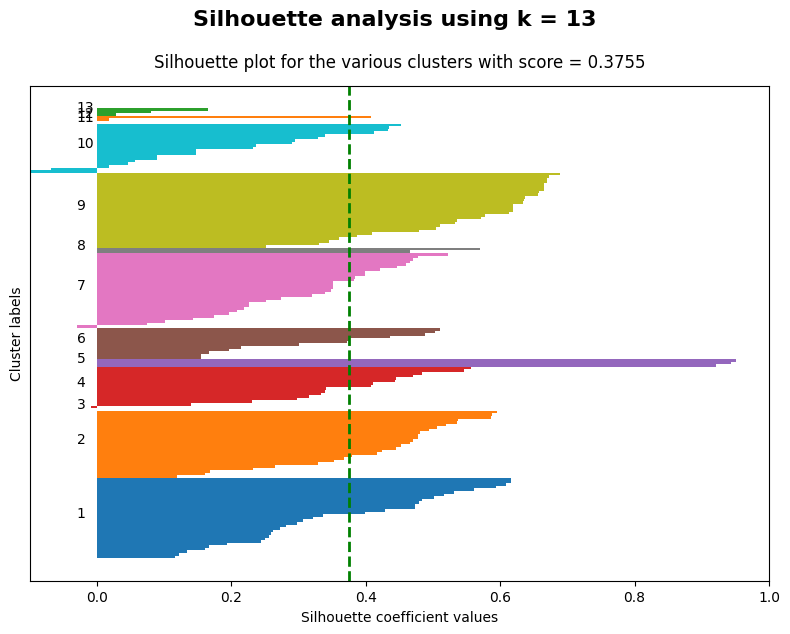

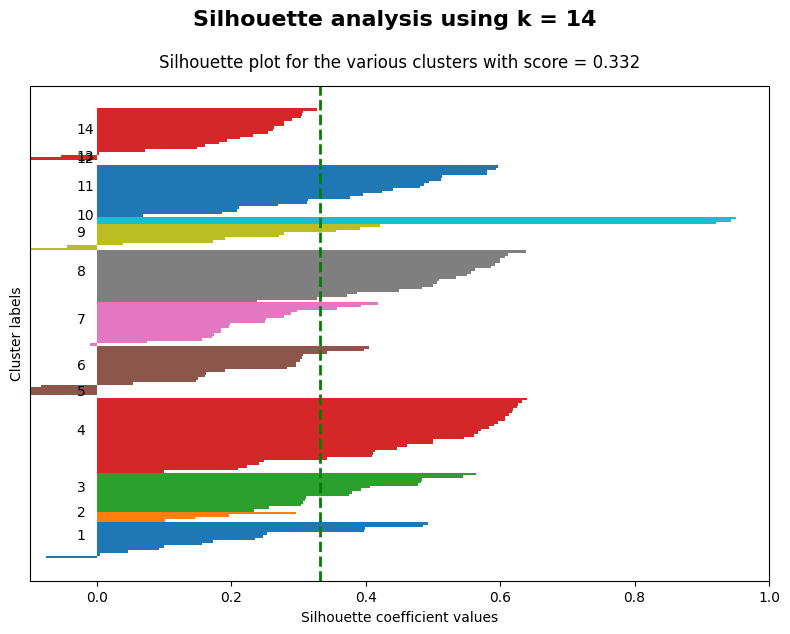

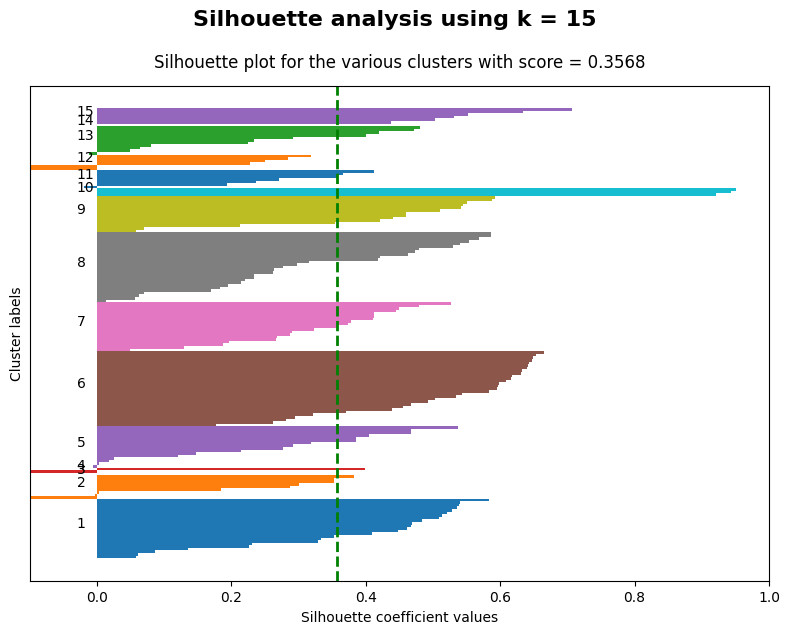

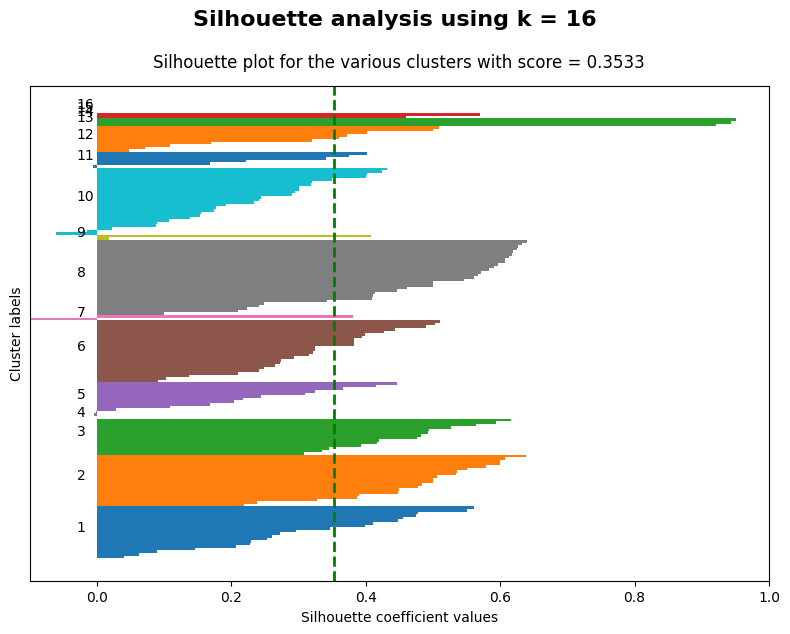

In [30]:
#Sillhoutette Analysis for Clustering
# Iterate over a range of cluster sizes
for i, k in enumerate([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]):
    # Create a figure and axis for plotting
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 6)
    
    # Perform K-means clustering
    km = KMeans(n_clusters=k, n_init=10)  
    labels = km.fit_predict(X_makanan)
    centroids = km.cluster_centers_

    # Calculate silhouette samples
    silhouette_vals = silhouette_samples(X_makanan, labels)

    # Plot the silhouette values for each cluster
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Calculate the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters with score = '+str(np.round(avg_score,4)), y=1.02)
    
    # Calculate the overall silhouette score for the clustering
    score = silhouette_score(X_makanan, labels)
    print(f"Silhouette score for k={k}: {score}")

    # Create a scatter plot of the data points colored by cluster labels
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}', fontsize=16, fontweight='semibold', y=1.05)

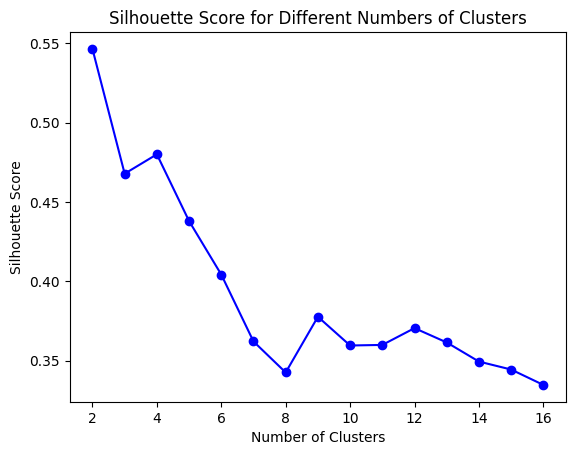

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Define the range of cluster sizes to evaluate
cluster_sizes = range(2, 17)

# Calculate the silhouette score for each number of clusters
silhouette_scores = []
for k in cluster_sizes:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(X_makanan)
    score = silhouette_score(X_makanan, labels)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.plot(cluster_sizes, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

In [36]:
# Perform K-means clustering with a specific number of clusters (8)
kmeansmodel = KMeans(n_clusters=8, init='k-means++', random_state=40, n_init=10)
y_kmeans = kmeansmodel.fit_predict(X_makanan) + 1

# Assign the cluster labels to a column called "food_segment" in the "food" dataframe
food["food_segment"] = np.array(y_kmeans)

In [37]:
food

,no,takaran_g,nama,energi_kkal,protein_g,lemak_g,karbohidrat_g,food_segment
0,1,100 gr,alpukat,85.0,0.900,6.500,7.700,2
1,2,100 gr,apel,58.0,30.120,30.120,14.900,2
2,3,25 gr,bakpia,68.0,2.175,1.675,11.025,2
3,4,1 mangkok,bakso,283.0,17.370,18.430,10.610,3
4,5,50 gr,bakwan,140.0,4.100,5.100,19.500,6
...,...,...,...,...,...,...,...,...
169,170,66 gr,es krim,133.0,2.320,7.080,16.100,6
170,171,1 gelas,jasuke,355.0,9.040,4.450,71.500,8
171,172,257 gr,burger,480.0,22.000,25.000,42.000,1
172,173,60 gr,cimol,133.0,3.130,0.580,24.810,6


In [ ]:
# food.to_csv("/content/drive/MyDrive/capstone/ML/data_makanan.csv",index=False)